In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
train_data_dir = '/content/drive/MyDrive/yuvraj1'

In [ ]:
#the training data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

#the validation data generator
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

#the testing data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  #shuffle to False for testing to get predictions in order
)

Found 6218 images belonging to 4 classes.
Found 1553 images belonging to 4 classes.
Found 7771 images belonging to 4 classes.


In [ ]:
# InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model and store the historyy
historyy = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
194/194 [==============================] - 667s 3s/step - loss: 0.1945 - accuracy: 0.9397 - val_loss: 0.3331 - val_accuracy: 0.9010
Epoch 2/50
194/194 [==============================] - 52s 265ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.1340 - val_accuracy: 0.9661
Epoch 3/50
194/194 [==============================] - 52s 266ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.3984 - val_accuracy: 0.8867
Epoch 4/50
194/194 [==============================] - 51s 263ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.1095 - val_accuracy: 0.9674
Epoch 5/50
194/194 [==============================] - 50s 260ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 1.6043 - val_accuracy: 0.7044
Epoch 6/50
194/194 [==============================] - 51s 261ms/step - loss: 0.0635 - accuracy: 0.9822 - val_loss: 4.0487 - val_accuracy: 0.7103
Epoch 7/50
194/194 [==============================] - 51s 261ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0335 - val_accu

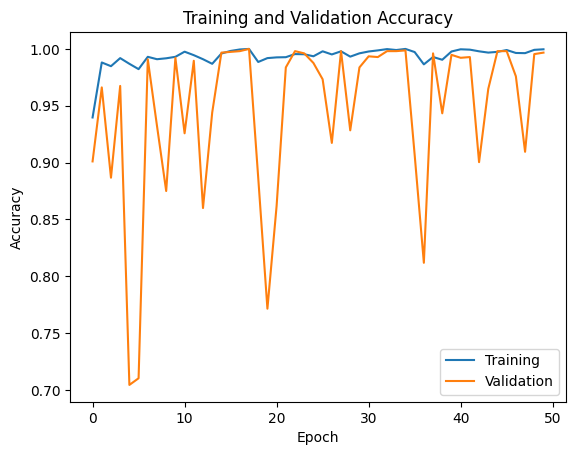

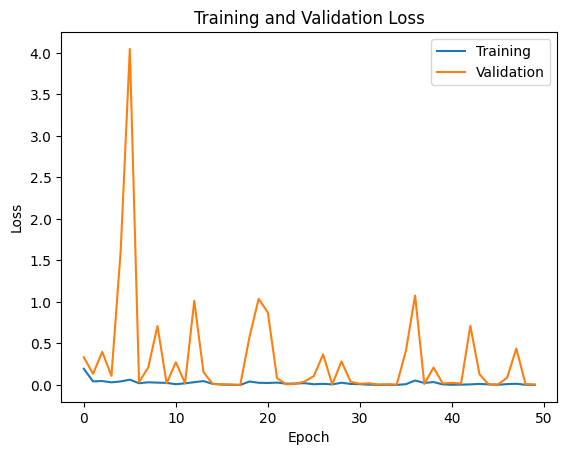

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(historyy.history['accuracy'])
plt.plot(historyy.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

# Plot the training and validation loss
plt.plot(historyy.history['loss'])
plt.plot(historyy.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
# Evaluate on training data
training_accuracy = model.evaluate(train_generator)[1]
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# Evaluate on validation data
validation_accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Evaluate on testing data
testing_accuracy = model.evaluate(test_generator)[1]
print(f'Testing Accuracy: {testing_accuracy * 100:.2f}%')

195/195 [==============================] - 20s 103ms/step - loss: 3.0213e-04 - accuracy: 1.0000
Training Accuracy: 100.00%
49/49 [==============================] - 7s 135ms/step - loss: 0.0059 - accuracy: 0.9968
Validation Accuracy: 99.68%
243/243 [==============================] - 26s 106ms/step - loss: 0.0014 - accuracy: 0.9994
Testing Accuracy: 99.94%
